#####  Sancheet Kumar Baidya
- MTech in Big Data Analytics
- Reg Num: 22MCB0029

###### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

###### Reading the csv file

In [2]:
df = pd.read_csv('edges.csv')

###### Printing the dataframe

In [3]:
df

,Source,Destination,Weight
0,A,B,10
1,A,C,12
2,B,C,14
3,B,E,9
4,B,D,8
5,C,E,10
6,C,F,12
7,D,H,8
8,E,D,12
9,E,G,10


###### Q1) Generate a directed and undirected graph from the given dataframe

In [4]:
list_edges_weights = list(df.itertuples(index=False, name=None))

In [5]:
def create_graph(graph):
    graph.add_weighted_edges_from(list_edges_weights)
    pos = {'A':[2,4], 'B':[4,7], 'C':[4, 1], 'D':[8,7], 'E':[6,4], 'F':[8,1], 'G':[10,4], 'H':[12,7] , 'I':[12,1], 'J':[14,4]}
    weight = nx.get_edge_attributes(G, 'weight')
    nx.draw(graph, pos=pos, with_labels=True,node_size= 1000, node_color='y', edge_color='b', arrowsize=35, font_size=18)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=weight , font_size =15);

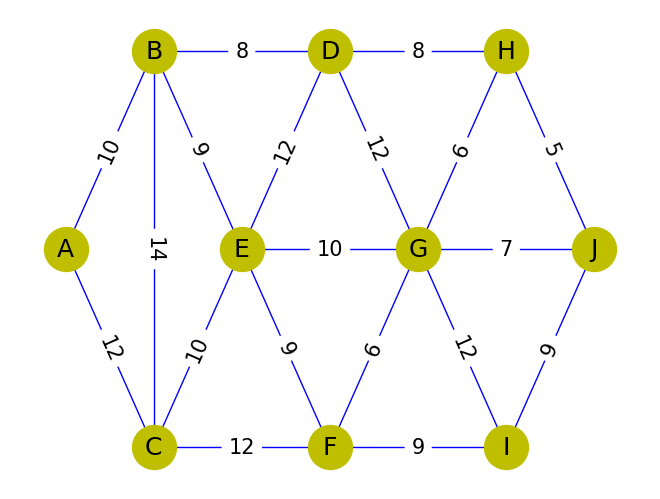

In [6]:
# Create Undirected graph
G = nx.Graph()
create_graph(G)

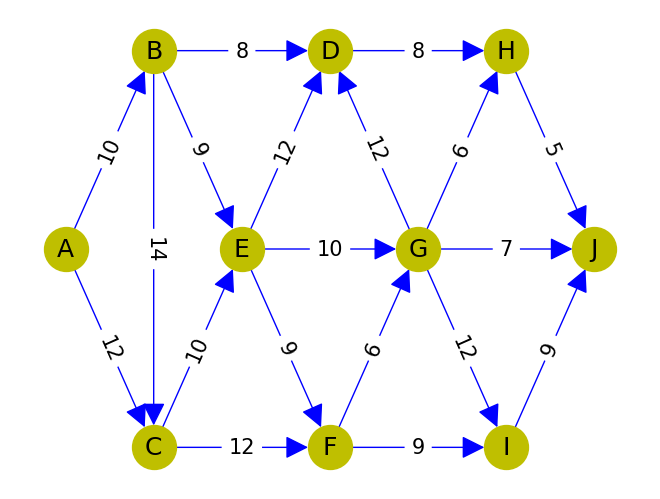

In [7]:
# Create direcetd graph
DG = nx.DiGraph()
create_graph(DG)

###### Q2) Find the following for the undirected graph
-  Number of nodes
-  Number of edges
-  Node with maximum degree
-  Node with minimum degree


In [8]:
#number of nodes
G.number_of_nodes()

10

In [9]:
#number of edges
G.number_of_edges()

19

In [10]:
#Node with maximum degree
max_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
max_degree[0]

('G', 6)

In [11]:
#Node with minimum degree
min_degree = sorted(G.degree, key=lambda x: x[1])
min_degree[0]

('A', 2)

###### Q3) Find the following for the directed graph
- Number of nodes
- Number of edges
- Nodes with maximum outdegree
- Nodes with minimum outdegree
- Nodes with maximum indegree
- Nodes with minimum indegree

In [12]:
#number of nodes
DG.number_of_nodes()

10

In [13]:
#number of edges
DG.number_of_edges()

19

In [15]:
#Node with maximum indegree
max_indegree = sorted(DG.in_degree, key=lambda x: x[1], reverse=True)
max_indegree[0]

('D', 3)

In [16]:
#Node with minimum indegree
min_indegree = sorted(DG.in_degree, key=lambda x: x[1])
min_indegree[0]

('A', 0)

In [17]:
#Node with maximum outdegree
max_outdegree = sorted(DG.out_degree, key=lambda x: x[1], reverse=True)
max_outdegree[0]

('G', 4)

In [18]:
#Node with minimum outdegree
min_outdegree = sorted(DG.out_degree, key=lambda x: x[1])
min_outdegree[0]

('J', 0)

###### Q4) Create adjacency matrix for both undirected and directed graph
- Row sum for all nodes
- Row sum and column sum for all nodes

In [33]:
def adj_matrix(graph):
    return nx.adjacency_matrix(graph).todense()

In [29]:
def row_sum(graph, matrix):
    x = np.array(matrix)
    nodes = list(graph)
    k=0
    for i in x:
        row_sum = 0
        for j in i:
            row_sum += j

        print(f"Node {nodes[k]}: {row_sum}")
        k += 1

In [41]:
def col_sum(graph, matrix):
    x = np.array(matrix)
    nodes = list(graph)
    k=0
    for i in range(9):
        col_sum = 0
        for j in range(9):
            col_sum += x[j][i]

        print(f"Node {nodes[k]}: {col_sum}")
        k += 1

In [34]:
# Adjacency matrix of undirected graph
adj_undir_matrix = adj_matrix(G)
adj_undir_matrix

matrix([[ 0, 10, 12,  0,  0,  0,  0,  0,  0,  0],
        [10,  0, 14,  9,  8,  0,  0,  0,  0,  0],
        [12, 14,  0, 10,  0, 12,  0,  0,  0,  0],
        [ 0,  9, 10,  0, 12,  9,  0, 10,  0,  0],
        [ 0,  8,  0, 12,  0,  0,  8, 12,  0,  0],
        [ 0,  0, 12,  9,  0,  0,  0,  6,  9,  0],
        [ 0,  0,  0,  0,  8,  0,  0,  6,  0,  5],
        [ 0,  0,  0, 10, 12,  6,  6,  0, 12,  7],
        [ 0,  0,  0,  0,  0,  9,  0, 12,  0,  9],
        [ 0,  0,  0,  0,  0,  0,  5,  7,  9,  0]], dtype=int32)

In [31]:
#row sum
row_sum(G, adj_undir_matrix)

Node A: 22
Node B: 41
Node C: 48
Node E: 50
Node D: 40
Node F: 36
Node H: 19
Node G: 53
Node I: 30
Node J: 21


In [35]:
# Adjacency matrix for directed graph
adj_dir_matrix = adj_matrix(DG)
adj_dir_matrix

matrix([[ 0, 10, 12,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 14,  9,  8,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 10,  0, 12,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 12,  9,  0, 10,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  6,  9,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5],
        [ 0,  0,  0,  0, 12,  0,  6,  0, 12,  7],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [42]:
# Row sum of adjacency matrix of directed graph
row_sum(DG, adj_dir_matrix)

Node A: 22
Node B: 31
Node C: 22
Node E: 31
Node D: 8
Node F: 15
Node H: 5
Node G: 37
Node I: 9
Node J: 0


In [43]:
# Column sum of adjacency matrix of directed graph
col_sum(DG, adj_dir_matrix)

Node A: 0
Node B: 10
Node C: 26
Node E: 19
Node D: 32
Node F: 21
Node H: 14
Node G: 16
Node I: 21


###### Q5) Calculating the centrality measures

In [94]:
def centrality_measures_directed(G):
    deg_centrality = dict(nx.degree_centrality(G)).values()
    closeness_centrality = dict(nx.closeness_centrality(G)).values()
    betweeness_centrality = dict(nx.betweenness_centrality(G)).values()
    #eigen_vector_centrality = dict(nx.eigenvector_centrality(G)).values()
    page_rank = dict(nx.pagerank(G)).values()
    #degree = dict(G.degree).values()
    nodes = list(G)
    
    data = {'Nodes':nodes,  'Degree_Centrality':deg_centrality, 
            'Closeness_Centrality':closeness_centrality,
            'Betweeness_Centrality':betweeness_centrality,
            'Page_Rank':page_rank}
    centrality_df = pd.DataFrame(data)
    return centrality_df.round(2)

In [95]:
# Centrality measures directed graph
centrality_directed_df = centrality_measures_directed(DG)
centrality_directed_df

,Nodes,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Page_Rank
0,A,0.22,0.00,0.00,0.04
1,B,0.44,0.11,0.04,0.05
2,C,0.44,0.22,0.06,0.07
3,E,0.56,0.25,0.09,0.08
4,D,0.44,0.44,0.05,0.10
5,F,0.44,0.30,0.08,0.09
6,H,0.33,0.39,0.02,0.13
7,G,0.67,0.31,0.10,0.09
8,I,0.33,0.33,0.01,0.11
9,J,0.33,0.47,0.00,0.25


In [104]:
def centrality_measures_undirected(G):
    deg_centrality = dict(nx.degree_centrality(G)).values()
    closeness_centrality = dict(nx.closeness_centrality(G)).values()
    betweeness_centrality = dict(nx.betweenness_centrality(G)).values()
    eigen_vector_centrality = dict(nx.eigenvector_centrality(G)).values()
    page_rank = dict(nx.pagerank(G)).values()
    nodes = list(G)
    
    data = {'Nodes':nodes,  'Degree_Centrality':deg_centrality, 
            'Closeness_Centrality':closeness_centrality,
            'Betweeness_Centrality':betweeness_centrality,
             'Eigen_Vector_Centrality': eigen_vector_centrality,
            'Page_Rank':page_rank}
    centrality_df = pd.DataFrame(data)
    return centrality_df.round(2)

In [106]:
# Centrality measures directed graph
centrality_undirected_df = centrality_measures_undirected(G)
centrality_undirected_df

,Nodes,Degree_Centrality,Closeness_Centrality,Betweeness_Centrality,Eigen_Vector_Centrality,Page_Rank
0,A,0.22,0.43,0.00,0.14,0.06
1,B,0.44,0.56,0.12,0.29,0.11
2,C,0.44,0.56,0.12,0.29,0.13
3,E,0.56,0.69,0.14,0.42,0.13
4,D,0.44,0.64,0.14,0.35,0.11
5,F,0.44,0.64,0.14,0.35,0.10
6,H,0.33,0.53,0.03,0.25,0.06
7,G,0.67,0.69,0.25,0.45,0.14
8,I,0.33,0.53,0.03,0.25,0.09
9,J,0.33,0.47,0.01,0.23,0.07


###### Q6) Analysis of the centrality scores

In [134]:
def find_max(dataframe, parameter):
    max_value = dataframe[parameter].max()
    max_index = np.argmax(dataframe[parameter])
    return max_value, max_index

In [135]:
def find_min(dataframe, parameter):
    min_value = dataframe[parameter].min()
    min_index = np.argmin(dataframe[parameter])
    return min_value, min_index

In [158]:
def create(dataframe, size):
    para = list(dataframe.columns)[1:]
    min_score = [None]*size
    min_node = [None]*size
    max_score = [None]*size
    max_node = [None]*size
    k=0
    
    for ele in para:
        min_score[k], min_node[k] = find_min(dataframe, ele)
        max_score[k], max_node[k] = find_max(dataframe, ele)
        k += 1
        
    d = {'Centrality': para, 'Min_Node':min_node, 'Min_score':  min_score, 'Max_Node':max_node, 'Max_Score':max_score }
    centrality_df = pd.DataFrame(d)
    return centrality_df

In [159]:
undirected_result_df = create(centrality_undirected_df,5)
undirected_result_df

,Centrality,Min_Node,Min_score,Max_Node,Max_Score
0,Degree_Centrality,0,0.22,7,0.67
1,Closeness_Centrality,0,0.43,3,0.69
2,Betweeness_Centrality,0,0.00,7,0.25
3,Eigen_Vector_Centrality,0,0.14,7,0.45
4,Page_Rank,0,0.06,7,0.14


In [160]:
directed_result_df = create(centrality_directed_df,4)
directed_result_df

,Centrality,Min_Node,Min_score,Max_Node,Max_Score
0,Degree_Centrality,0,0.22,7,0.67
1,Closeness_Centrality,0,0.00,9,0.47
2,Betweeness_Centrality,0,0.00,7,0.10
3,Page_Rank,0,0.04,9,0.25
